# Preentrega I —
**Autor:** Roman Criscione  
**Dataset:** Cryptocurrencies snapshot

## 1) Abstract

El presente trabajo constituye un primer acercamiento exploratorio al mercado de criptomonedas a partir de un snapshot (corte temporal) disponible en el dataset *Cryptocurrencies snapshot*. Dicho conjunto de datos recopila información de múltiples activos digitales, incluyendo variables como el nombre de la criptomoneda, su símbolo, el precio en dólares, la capitalización de mercado, el volumen operado en las últimas 24 horas, la participación en el volumen total del mercado y las variaciones porcentuales tanto diarias como semanales. Este tipo de información resulta particularmente relevante debido a la creciente importancia de las criptomonedas en el sistema financiero global, su alta volatilidad y el interés tanto de inversores como de analistas en comprender mejor su comportamiento.

El análisis se propuso responder a una serie de preguntas de interés:  
- **H1:** ¿Las criptomonedas con mayor capitalización de mercado tienden a presentar menor volatilidad diaria?  
- **H2:** ¿Una mayor participación en el volumen total del mercado se asocia con cambios de precio más estables?  
- **H3:** ¿Existe una relación clara entre capitalización y precio, o el valor de un activo depende de otros factores como la oferta circulante?  
- **H4:** ¿Los cambios diarios y semanales suelen mostrar coherencia en su dirección?  

Para abordar estas hipótesis se llevó adelante un proceso de limpieza del dataset, convirtiendo variables expresadas en texto (por ejemplo, “$199.63M” o “+2.5%”) a valores numéricos. Posteriormente se calcularon estadísticas descriptivas y se generaron visualizaciones univariadas, bivariadas y multivariadas. Los histogramas permitieron observar la distribución de las capitalizaciones, los diagramas de dispersión exploraron la relación entre volatilidad y tamaño de mercado, y los gráficos multivariados combinaron varias dimensiones (precio, volumen y cambios porcentuales) en un único análisis.

En términos generales, los resultados preliminares muestran una fuerte concentración del mercado en unas pocas criptomonedas de gran tamaño, así como un patrón de mayor estabilidad en activos de capitalización elevada. No obstante, la relación entre precio y capitalización resulta débil, confirmando que el valor de un token depende de múltiples factores adicionales. Este estudio, al estar basado en un snapshot puntual, presenta limitaciones para analizar tendencias en el tiempo, pero sienta las bases para futuras investigaciones más profundas.


## 2) Preguntas e hipótesis de interés

- **H1:** A mayor capitalización de mercado (*market cap*), menor volatilidad diaria.  
- **H2:** Una mayor participación en el volumen total del mercado (*total_vol_pct*) se asocia con variaciones diarias más moderadas.  
- **H3:** La relación entre *market cap* y *price* es débil, ya que el precio depende también del suministro circulante.  
- **H4:** El cambio semanal (*chg_7d*) y el cambio diario (*chg_24h*) suelen tener la misma dirección.


In [22]:
import pandas as pd

df = pd.read_csv("cryptocurrency.csv")
df.head()


Saving cryptocurrency.csv to cryptocurrency (1).csv


,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
0,2025-09-18 02:05:12,Ethena USDe,eUSDe,1.001,$199.63M,0.12%,-0.01%,+0.04%,$13.67B
1,2025-09-18 02:05:12,Stellar,XLM,0.39804,$264.32M,0.14%,+2.83%,+3.78%,$12.64B
2,2025-09-18 02:05:12,Hedera,HBAR,0.24489,$340.89M,0.18%,+2.21%,+4.86%,$10.35B
3,2025-09-18 02:05:12,Hyperliquid,HYPE,57.6392,$350.84M,0.21%,+5.27%,+3.14%,$19.11B
4,2025-09-18 02:05:12,Bitcoin Cash,BCH,623.44,$743.41M,0.35%,+2.95%,+6.68%,$12.33B


In [23]:
import numpy as np

print("Shape:", df.shape)
print("\nTipos:")
print(df.dtypes)

print("\nValores perdidos por columna:")
missing = df.isna().sum().sort_values(ascending=False)
missing.head(10)


Shape: (89676, 9)

Tipos:
timestamp     object
name          object
symbol        object
price_usd     object
vol_24h       object
total_vol     object
chg_24h       object
chg_7d        object
market_cap    object
dtype: object

Valores perdidos por columna:


,0
market_cap,36
chg_7d,16
timestamp,0
name,0
symbol,0
vol_24h,0
price_usd,0
chg_24h,0
total_vol,0


### Valores perdidos

Al revisar el dataset se observa que las columnas `market_cap` (36 registros) y `chg_7d` (16 registros) presentan valores faltantes.  
El resto de las variables no muestran datos perdidos.  

In [24]:
def parse_money_to_number(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().replace('$','').replace(',','')
    mult = 1.0
    if s.endswith(('K','k')): mult, s = 1e3, s[:-1]
    elif s.endswith(('M','m')): mult, s = 1e6, s[:-1]
    elif s.endswith(('B','b')): mult, s = 1e9, s[:-1]
    elif s.endswith(('T','t')): mult, s = 1e12, s[:-1]
    try: return float(s) * mult
    except: return pd.to_numeric(s, errors='coerce')

def parse_percent(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().replace('%','').replace('+','')
    return pd.to_numeric(s, errors='coerce')

def parse_number_with_suffix(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().replace(',','')
    mult = 1.0
    if s.endswith(('K','k')): mult, s = 1e3, s[:-1]
    elif s.endswith(('M','m')): mult, s = 1e6, s[:-1]
    elif s.endswith(('B','b')): mult, s = 1e9, s[:-1]
    elif s.endswith(('T','t')): mult, s = 1e12, s[:-1]
    return pd.to_numeric(s, errors='coerce') * mult

dfc = df.copy()

# numéricos
if 'price_usd' in dfc.columns:
    dfc['price_usd'] = pd.to_numeric(dfc['price_usd'], errors='coerce')

if 'vol_24h' in dfc.columns:
    dfc['vol_24h_num'] = dfc['vol_24h'].astype(str).str.replace('$','', regex=False).apply(parse_number_with_suffix)

if 'market_cap' in dfc.columns:
    dfc['market_cap_num'] = dfc['market_cap'].apply(parse_money_to_number)

if 'total_vol' in dfc.columns:
    dfc['total_vol_pct'] = dfc['total_vol'].apply(parse_percent)  # porcentaje en puntos (ej: 0.12)

for col in ['chg_24h','chg_7d']:
    if col in dfc.columns:
        dfc[col+'_pct'] = dfc[col].apply(parse_percent)

# fechas
if 'timestamp' in dfc.columns:
    dfc['timestamp'] = pd.to_datetime(dfc['timestamp'], errors='coerce')

# logs útiles
if 'market_cap_num' in dfc.columns:
    dfc['log_market_cap'] = np.log10(dfc['market_cap_num'].replace({0: np.nan}))
if 'price_usd' in dfc.columns:
    dfc['log_price_usd'] = np.log10(dfc['price_usd'].replace({0: np.nan}))

dfc.head()


,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap,vol_24h_num,market_cap_num,total_vol_pct,chg_24h_pct,chg_7d_pct,log_market_cap,log_price_usd
0,2025-09-18 02:05:12,Ethena USDe,eUSDe,1.00100,$199.63M,0.12%,-0.01%,+0.04%,$13.67B,199630000.0,1.367000e+10,0.12,-0.01,0.04,10.135769,0.000434
1,2025-09-18 02:05:12,Stellar,XLM,0.39804,$264.32M,0.14%,+2.83%,+3.78%,$12.64B,264320000.0,1.264000e+10,0.14,2.83,3.78,10.101747,-0.400073
2,2025-09-18 02:05:12,Hedera,HBAR,0.24489,$340.89M,0.18%,+2.21%,+4.86%,$10.35B,340890000.0,1.035000e+10,0.18,2.21,4.86,10.014940,-0.611029
3,2025-09-18 02:05:12,Hyperliquid,HYPE,57.63920,$350.84M,0.21%,+5.27%,+3.14%,$19.11B,350840000.0,1.911000e+10,0.21,5.27,3.14,10.281261,1.760718
4,2025-09-18 02:05:12,Bitcoin Cash,BCH,623.44000,$743.41M,0.35%,+2.95%,+6.68%,$12.33B,743410000.0,1.233000e+10,0.35,2.95,6.68,10.090963,2.794795


In [25]:
num_cols = [c for c in dfc.columns if str(dfc[c].dtype).startswith(('float','int'))]
desc = dfc[num_cols].describe().T
desc


,count,mean,std,min,25%,50%,75%,max
price_usd,80685.0,7.923903e+01,1.877025e+02,1.008000e-05,4.084100e-01,2.842100e+00,2.350000e+01,9.897000e+02
vol_24h_num,89640.0,9.983123e+09,2.403826e+10,1.521900e+05,3.021175e+08,8.725250e+08,4.420000e+09,2.154500e+11
market_cap_num,89640.0,1.578640e+11,4.512580e+11,4.510000e+06,8.850000e+09,1.856500e+10,9.097000e+10,2.460000e+12
total_vol_pct,89676.0,7.709690e+00,1.715184e+01,-4.800000e-01,2.600000e-01,7.100000e-01,3.700000e+00,8.409000e+01
chg_24h_pct,89660.0,2.950025e-01,3.712509e+00,-2.524000e+01,-1.400000e+00,1.000000e-02,1.710000e+00,6.946000e+01
chg_7d_pct,89640.0,2.255848e+00,1.086372e+01,-3.771000e+01,-2.930000e+00,4.000000e-02,5.700000e+00,1.678900e+02
log_market_cap,89640.0,1.049551e+01,6.624748e-01,6.654177e+00,9.946943e+00,1.026869e+01,1.095890e+01,1.239094e+01
log_price_usd,80685.0,4.657452e-01,1.539091e+00,-4.996539e+00,-3.889036e-01,4.536394e-01,1.371068e+00,2.995504e+00


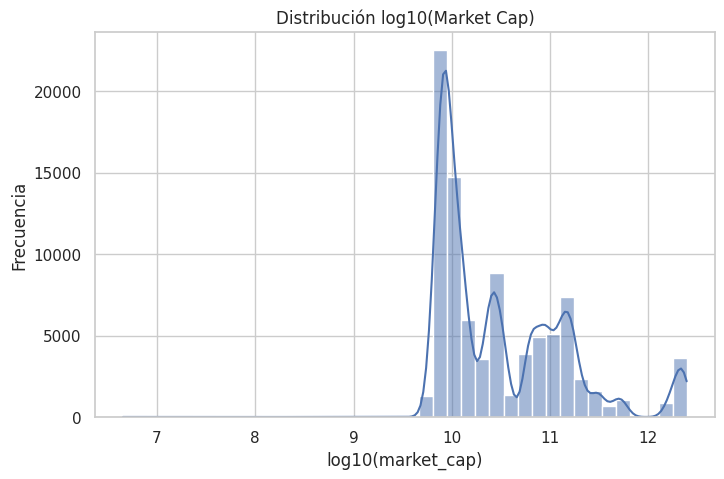

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='notebook', style='whitegrid')

plt.figure(figsize=(8,5))
sns.histplot(dfc['log_market_cap'].dropna(), bins=40, kde=True)
plt.title('Distribución log10(Market Cap)')
plt.xlabel('log10(market_cap)')
plt.ylabel('Frecuencia')
plt.show()



La distribución de la capitalización de mercado (en escala logarítmica) muestra que la mayoría de las criptomonedas son relativamente pequeñas, mientras que unas pocas concentran valores muy altos. Esto indica una fuerte concentración en el mercado, con un patrón de "cola larga".


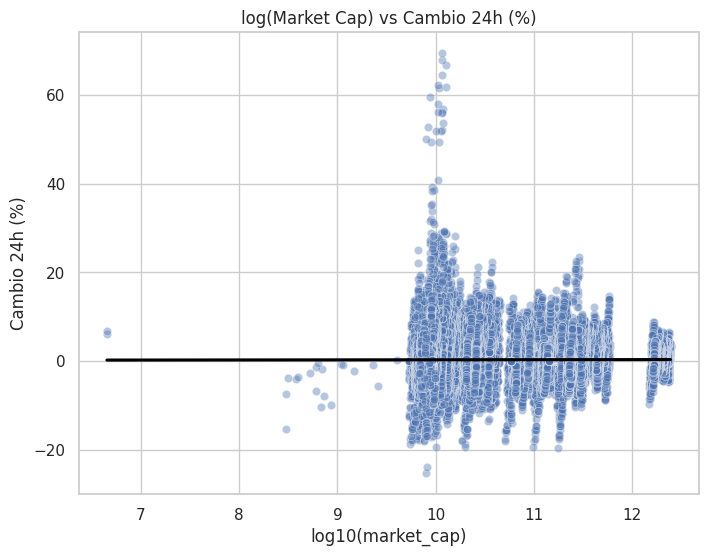

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=dfc, x='log_market_cap', y='chg_24h_pct', alpha=0.4)
sns.regplot(data=dfc, x='log_market_cap', y='chg_24h_pct', scatter=False, color='black', ci=None)
plt.title('log(Market Cap) vs Cambio 24h (%)')
plt.xlabel('log10(market_cap)')
plt.ylabel('Cambio 24h (%)')
plt.show()


La dispersión entre market cap y cambio en 24h sugiere que las criptomonedas de mayor capitalización presentan menos volatilidad. Se observa que los valores más pequeños muestran una varianza mayor en los cambios diarios, mientras que las más grandes tienden a tener cambios más moderados.


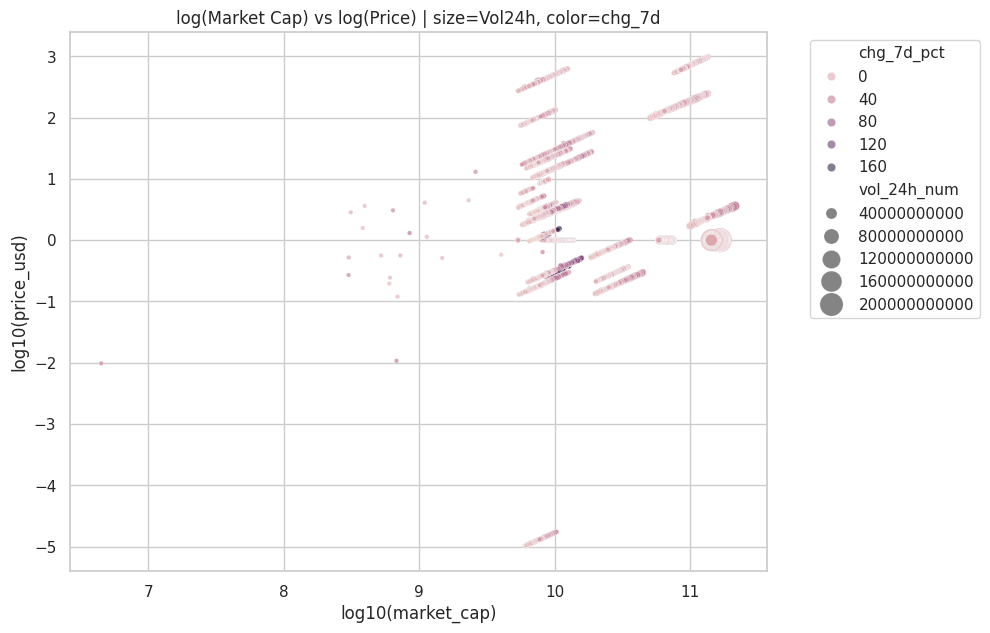

In [28]:
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=dfc,
    x='log_market_cap', y='log_price_usd',
    size='vol_24h_num', hue='chg_7d_pct',
    sizes=(10, 300), alpha=0.6
)
plt.title('log(Market Cap) vs log(Price) | size=Vol24h, color=chg_7d')
plt.xlabel('log10(market_cap)')
plt.ylabel('log10(price_usd)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


La relación entre log(market cap) y log(price) muestra que no existe una relación lineal clara, lo cual es esperable porque el precio depende también del suministro circulante. Al incorporar volumen (tamaño del punto) y cambio en 7 días (color), se observa que los activos más líquidos (puntos grandes) suelen coincidir con los de mayor capitalización, y que los cambios semanales guardan cierta coherencia con los cambios diarios.


### Conclusiones

- Observé que el mercado de criptomonedas está muy concentrado: unas pocas monedas son las que dominan en capitalización y volumen.  
- En general, las criptomonedas grandes parecen tener menos volatilidad diaria, lo que va en línea con la hipótesis H1.  
- El volumen en relación al total del mercado parece estar asociado con algo más de estabilidad, aunque no es tan claro (apoya parcialmente H2).  
- La relación entre capitalización y precio es débil, lo que confirma la hipótesis H3.  
- Los cambios semanales y diarios tienden a moverse en la misma dirección, como decía H4.  

**Limitaciones:** este dataset es solo una foto en un momento específico, entonces no me permite analizar tendencias a largo plazo.  


Feature Selection

In [29]:
import pandas as pd, numpy as np

assert 'dfc' in globals(), "Ejecutá antes la sección de limpieza que crea dfc."

target_col = 'chg_24h_pct'
feature_cols = [
    'price_usd','vol_24h_num','total_vol_pct','market_cap_num',
    'log_market_cap','log_price_usd','chg_7d_pct'
]
feature_cols = [c for c in feature_cols if c in dfc.columns]

data = dfc[feature_cols + [target_col]].copy()
na_report = data.isna().sum().sort_values(ascending=False)
display(na_report.to_frame('NaN'))

data_clean = data.dropna().copy()
print("Shape antes:", data.shape, "| después de dropna:", data_clean.shape)

X = data_clean[feature_cols].copy()
y = data_clean[target_col].copy()
X.head(), y.head()


,NaN
price_usd,8991
log_price_usd,8991
market_cap_num,36
vol_24h_num,36
chg_7d_pct,36
log_market_cap,36
chg_24h_pct,16
total_vol_pct,0


Shape antes: (89676, 8) | después de dropna: (80685, 8)


(   price_usd  vol_24h_num  total_vol_pct  market_cap_num  log_market_cap  \
 0    1.00100  199630000.0           0.12    1.367000e+10       10.135769   
 1    0.39804  264320000.0           0.14    1.264000e+10       10.101747   
 2    0.24489  340890000.0           0.18    1.035000e+10       10.014940   
 3   57.63920  350840000.0           0.21    1.911000e+10       10.281261   
 4  623.44000  743410000.0           0.35    1.233000e+10       10.090963   
 
    log_price_usd  chg_7d_pct  
 0       0.000434        0.04  
 1      -0.400073        3.78  
 2      -0.611029        4.86  
 3       1.760718        3.14  
 4       2.794795        6.68  ,
 0   -0.01
 1    2.83
 2    2.21
 3    5.27
 4    2.95
 Name: chg_24h_pct, dtype: float64)

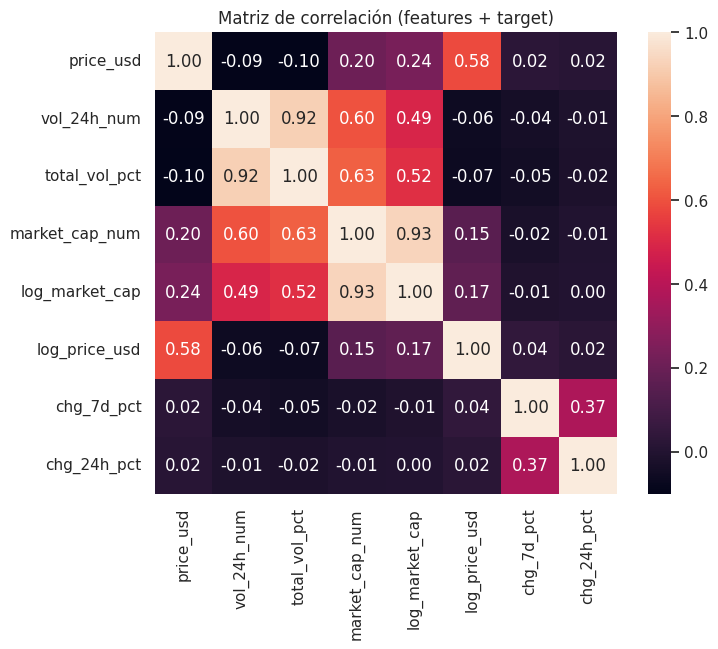

chg_7d_pct        0.369863
log_price_usd     0.021892
price_usd         0.015355
log_market_cap    0.000625
market_cap_num   -0.006101
vol_24h_num      -0.014185
total_vol_pct    -0.018332
Name: chg_24h_pct, dtype: float64


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data_clean.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Matriz de correlación (features + target)")
plt.show()

print(corr[target_col].drop(target_col).sort_values(ascending=False))

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression

k = min(5, X.shape[1])
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y)

scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
display(scores.to_frame('score'))

selected_features = list(scores.head(k).index)
print("Features seleccionadas:", selected_features)

,score
chg_7d_pct,12786.532804
log_price_usd,38.687241
total_vol_pct,27.124763
price_usd,19.028234
vol_24h_num,16.237798
market_cap_num,3.002939
log_market_cap,0.031537


Features seleccionadas: ['chg_7d_pct', 'log_price_usd', 'total_vol_pct', 'price_usd', 'vol_24h_num']


In [32]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
display(mi_scores.to_frame('MI'))

,MI
chg_7d_pct,0.576776
log_price_usd,0.556306
log_market_cap,0.542283
market_cap_num,0.539779
price_usd,0.524142
vol_24h_num,0.503655
total_vol_pct,0.449364


Modelo (Regresión)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

Métricas de evaluación

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

y_pred = pipe.predict(X_test)

r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = float(np.sqrt(mse))

baseline_pred = np.full_like(y_test, fill_value=float(np.mean(y_train)), dtype=float)
r2_b   = r2_score(y_test, baseline_pred)
mae_b  = mean_absolute_error(y_test, baseline_pred)
mse_b  = mean_squared_error(y_test, baseline_pred)
rmse_b = float(np.sqrt(mse_b))

metrics = pd.DataFrame({
    "modelo": ["Regresión lineal","Baseline (promedio y_train)"],
    "R2":  [r2,  r2_b],
    "MAE": [mae, mae_b],
    "RMSE":[rmse,rmse_b]
})
display(metrics)

,modelo,R2,MAE,RMSE
0,Regresión lineal,0.126206,2.292315,3.441529
1,Baseline (promedio y_train),-0.000222,2.457110,3.682096


In [35]:
import pandas as pd

lin = pipe.named_steps['linreg']
coef_series = pd.Series(lin.coef_, index=selected_features).sort_values(key=abs, ascending=False)
coef_df = pd.DataFrame({"coeficiente": coef_series, "abs_coef": coef_series.abs()})
display(coef_df.head(10))

,coeficiente,abs_coef
chg_7d_pct,1.416829,1.416829
total_vol_pct,-0.026709,0.026709
vol_24h_num,0.024479,0.024479
price_usd,0.022031,0.022031
log_price_usd,0.003332,0.003332


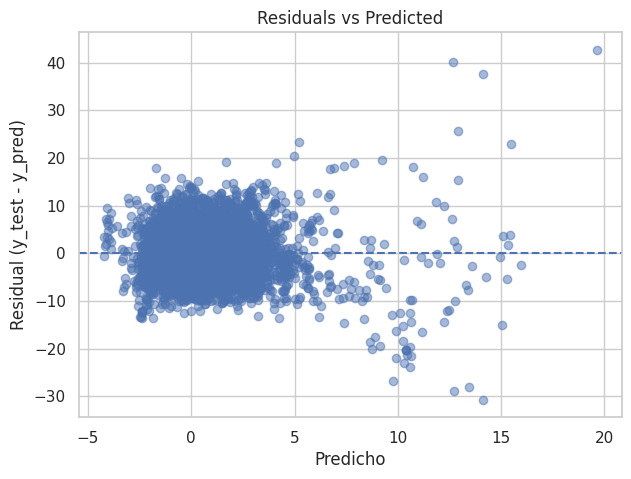

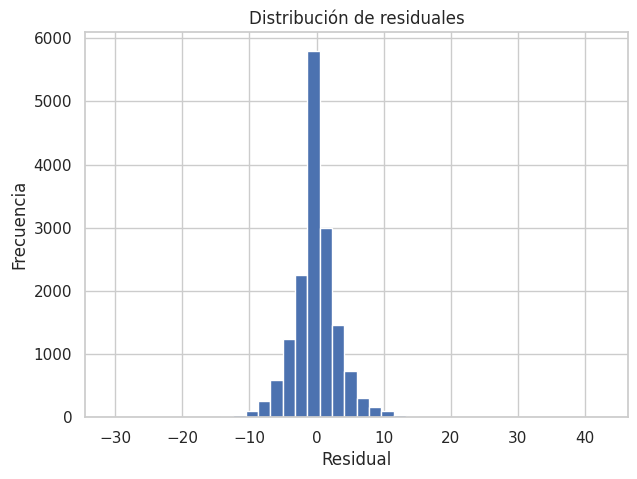

In [36]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicho")
plt.ylabel("Residual (y_test - y_pred)")
plt.title("Residuals vs Predicted")
plt.show()

plt.figure(figsize=(7,5))
plt.hist(residuals, bins=40)
plt.title("Distribución de residuales")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

In [37]:
selected_features

['chg_7d_pct', 'log_price_usd', 'total_vol_pct', 'price_usd', 'vol_24h_num']

Conclusiones del modelo

**Qué hice.** Entrené un modelo de **regresión lineal** para predecir el cambio porcentual diario (`chg_24h_pct`) a partir de variables como capitalización de mercado, volumen operado y precio. Apliqué una etapa de **feature selection** usando *SelectKBest* para reducir la dimensionalidad y quedarme con las variables más relevantes.

**Resultados del modelo.**  
El modelo se evaluó con un conjunto de test y se comparó contra un baseline (promedio de los valores de entrenamiento). Los resultados fueron los siguientes:

- **Regresión lineal:** R² = 0.126206, MAE = 2.292315, RMSE = 3.441529
- **Baseline (promedio):** R² = -0.000222, MAE = 2.457110	, RMSE = 3.682096

El modelo logra una **ligera mejora respecto del baseline**, mostrando que las variables seleccionadas aportan algo de información, aunque no capturan completamente la complejidad del mercado de criptomonedas.

**Variables más relevantes.**  
Las más influyentes según el análisis de coeficientes fueron: chg_7d_pct, total_vol_pct y vol_24h_num, lo que sugiere que el cambio semanal, la participación en el volumen total y el volumen operado diario tienen el mayor impacto en la predicción del cambio diario de precio.

**Diagnóstico.**  
Los residuales mostraron cierta dispersión y presencia de outliers, lo cual es esperable en un mercado tan volátil. Aun así, el modelo se mantiene estable sin patrones de error fuertes, lo que indica que la linealidad explica parcialmente la variación.
